# To Predict optimum clusters for IRIS Dataset
![<span>Photo by <a href="https://unsplash.com/@gleee?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">GLEEE Family</a> on <a href="https://unsplash.com/s/photos/iris?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>](https://raw.githubusercontent.com/Dutta-SD/Images_Unsplash/master/gleee-family-Gii7biSQ7UQ-unsplash.jpg)

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data file and see what should be the ideal number of clusters

In [5]:
data = pd.read_csv('./Iris.csv', index_col = 'Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Ideal number of clusters should be the number of species that are present
# We can use `unique` function for this
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are 3 clusters. Our unsupervised learning should also give about 3 clusters ideally. Let us see what it give us

In [7]:
# First we drop the column containing Species
data2 = data.drop(['Species'], axis = 1)
data2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


## Plotting the data

<Figure size 1440x720 with 0 Axes>

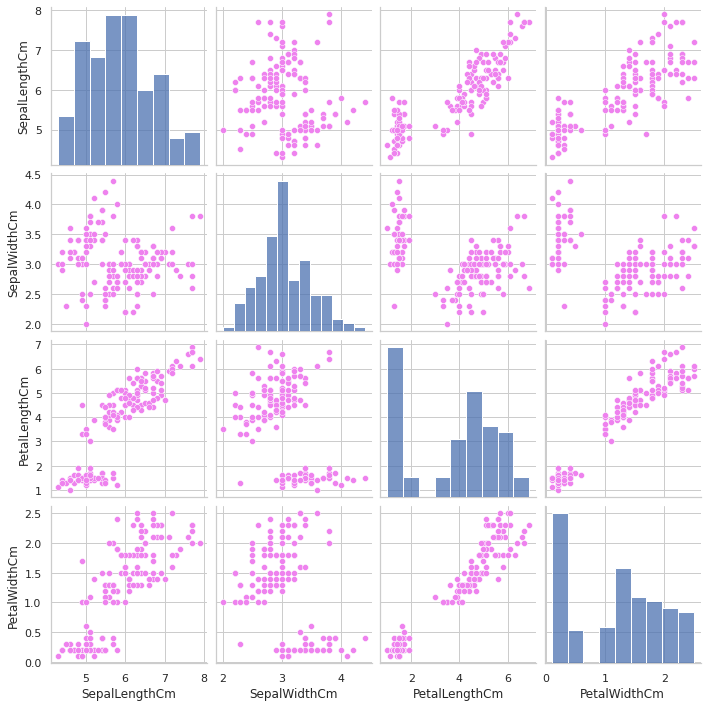

In [112]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (20, 10))
sns.pairplot(data2, plot_kws = {'color' : 'violet'});

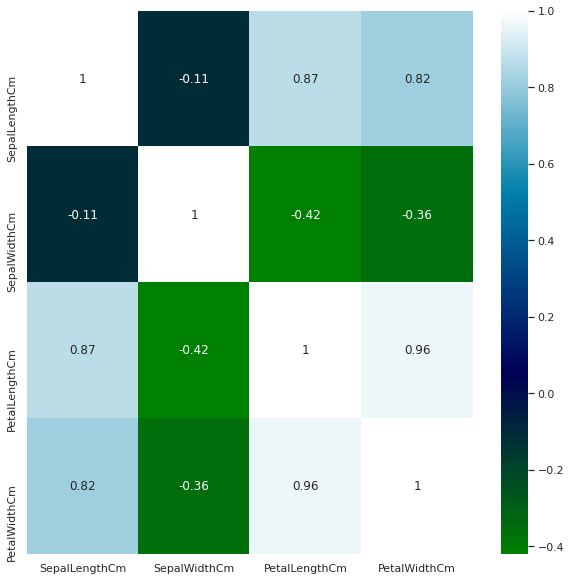

In [111]:
# Heatmap, for correlation plot
sns.set()
plt.figure(figsize = (10, 10))
sns.heatmap(data2.corr(), annot = True, cmap = 'ocean');

## Scaling

As we are using distance based clustering techniques, so if features ar on a different scale, then it might be problematic for us. Some features might disrupt the measures even if they are not that important, just because of Scale

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
sscaler = StandardScaler()
X = sscaler.fit_transform(data2)

## DBSCAN based Clustering

In [124]:
clsModel = DBSCAN()

## Counter calculates the counts for each value in nd array
preds = clsModel.fit_predict(X)

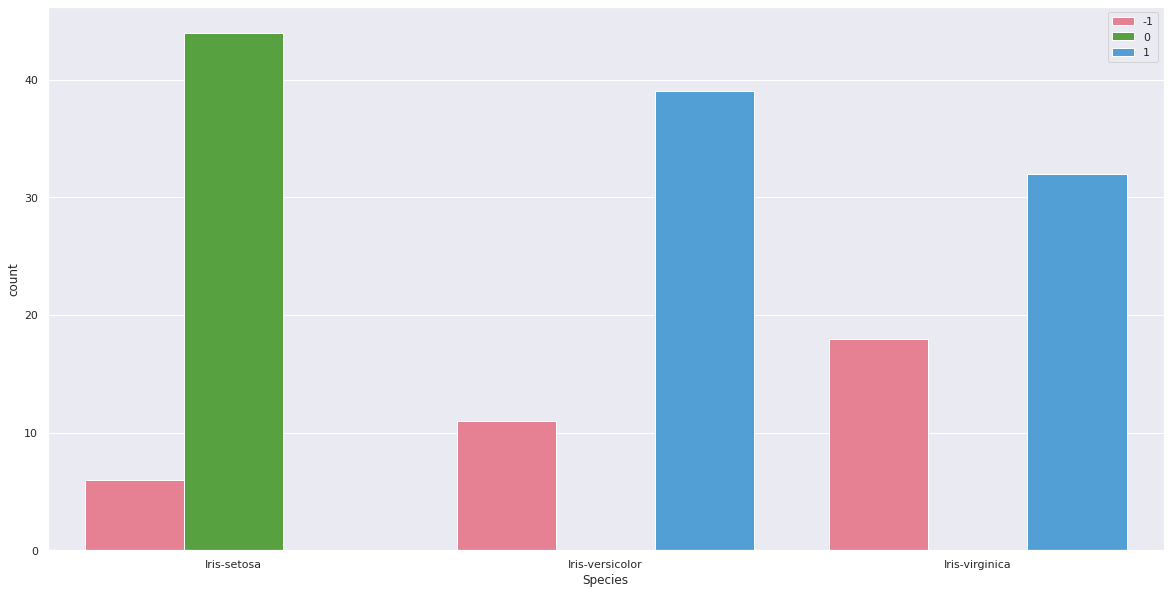

In [161]:
plt.figure(figsize = (20, 10))
sns.set()
sns.countplot(x = data['Species'], hue = preds, palette='husl');

The first few columns were of `Iris Setosa`, which seems to have got the label of 0. 
DBSCAN predicts The number of clusters to be 3. 

However, the decision boundary between Versicolor and Virginica is blurred, and there are a lot of false predictions as we see.

What DBSCAN tells us clearly is that the optimum number of cluster might be 3.

## Clustering using K Means

In [126]:
from sklearn.cluster import KMeans

In [140]:
distances = []

## this loop for determining the ideal elbow

for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    distances.append(km.inertia_)

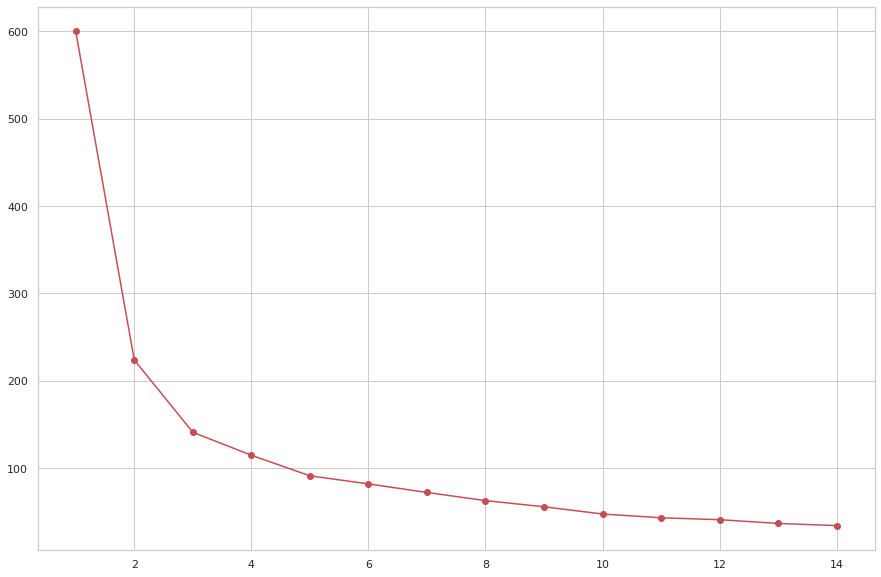

In [145]:
plt.figure(figsize=(15, 10))
plt.plot(range(1, 15), distances, 'r-o');

Indeed, the optimum number of clusters come out to be 3 in this case too.

## Checking the accuracy of kMeans

In [147]:
km = KMeans(n_clusters=3)   ### Final Model fitting
predictions = km.fit_predict(X)

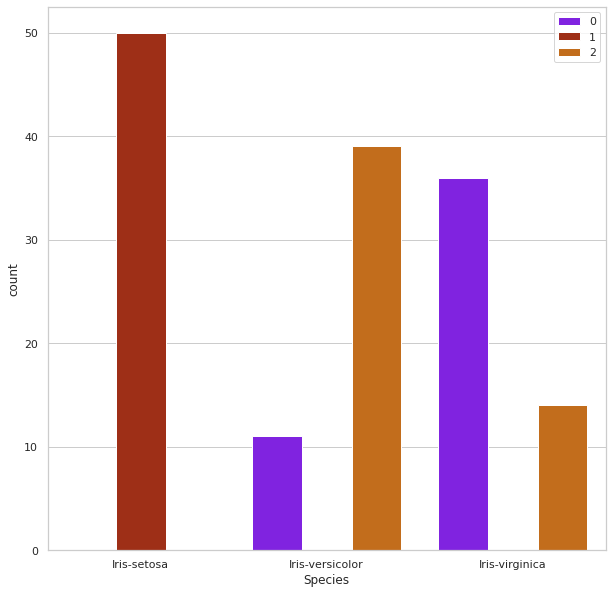

In [160]:
plt.figure(figsize=(10, 10))
sns.countplot(x = data['Species'], hue = predictions, palette='gnuplot');

Iris setosa is class 1. Versicolor seems to be class 2. Virginica is class 0.

## Confusion Matrix

In [155]:
actual = data['Species'].map({'Iris-setosa' : 1,
                             'Iris-versicolor' : 2,
                             'Iris-virginica' : 0}) ## maps values like label encoding

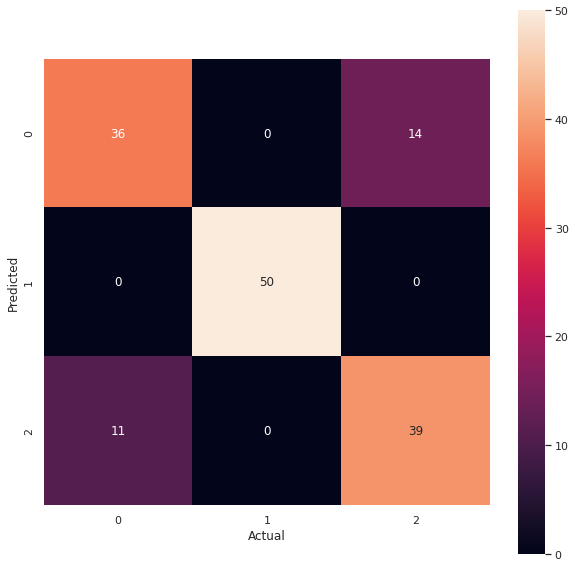

In [164]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(actual, predictions), annot = True, square=True);
plt.xlabel('Actual');
plt.ylabel('Predicted');